# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [2]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


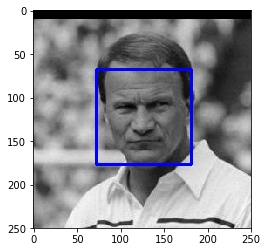

In [3]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[4])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [4]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
Detected Humans: 98.00%,
Detected Dogs: 17.00%

In [6]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_count = 0
dog_count = 0

for i in range(len(human_files_short)):
    
    human_result = face_detector(human_files_short[i])
    dog_result = face_detector(dog_files_short[i])
    
    if human_result is True:
        human_count += 1
        
    if dog_result is True:
        dog_count += 1


human_pct = (human_count / len(human_files_short)) * 100
dog_pct = (dog_count / len(dog_files_short)) * 100

print("Detected Humans: {:.2f}%".format(human_pct))
print("Detected Dogs: {:.2f}%".format(dog_pct))


Detected Humans: 98.00%
Detected Dogs: 17.00%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [7]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 98255777.19it/s] 


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [8]:
import json

class_idx = json.load(open("imagenet_class_index.json"))
idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]
#print(class_idx)
print(len(idx2label[151:269]))

118


In [9]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    img_transform = transforms.Compose([transforms.Resize(size = (244,244)),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                                             std = [0.229, 0.224, 0.225])])
    img = Image.open(img_path)
    img = img_transform(img).unsqueeze_(0) 
    
    #print(img.shape)
    
    if use_cuda:
        img = img.cuda()
    
    output = VGG16(img)
    _, pred = torch.max(output, 1)
    pred = int(np.squeeze(pred.numpy()) if not use_cuda else np.squeeze(pred.cpu().numpy()))
    
    result = idx2label[pred]
    
    return pred # predicted class index

In [10]:
img_path = './images/African_Bush_Elephant.jpg'
VGG16_predict(img_path)

386

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [11]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    index = VGG16_predict(img_path)
    if (index >= 151 and index <= 268):
        return True
    else:
        return False

In [12]:
dog_detector(img_path)

False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
Detected Humans: 0.00%,
Detected Dogs: 100.00%

In [13]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_count = 0
dog_count = 0

for i in range(len(dog_files_short)):
    
    human_result = dog_detector(human_files_short[i])
    dog_result = dog_detector(dog_files_short[i])
    
    if human_result is True:
        human_count += 1
        
    if dog_result is True:
        dog_count += 1

human_pct = (human_count / len(human_files_short)) * 100
dog_pct = (dog_count / len(dog_files_short)) * 100

print("Detected Humans: {:.2f}%".format(human_pct))
print("Detected Dogs: {:.2f}%".format(dog_pct))
    

Detected Humans: 0.00%
Detected Dogs: 100.00%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [14]:
import os
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import PIL

batch_size = 20

train_transforms = transforms.Compose([transforms.Resize(256),
                                       transforms.RandomCrop(224),
                                       transforms.RandomHorizontalFlip(0.3),
                                       transforms.RandomVerticalFlip(0.3),
                                       transforms.RandomRotation(45),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                                             std = [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                                            std = [0.229, 0.224, 0.225])])

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
train_data = datasets.ImageFolder('/data/dog_images/train', transform=train_transforms)
valid_data = datasets.ImageFolder('/data/dog_images/valid', transform=test_transforms)
test_data = datasets.ImageFolder('/data/dog_images/test',  transform=test_transforms)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

loaders_scratch = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}

In [15]:
print(len(train_data))
print(len(train_loader))


6680
334


In [16]:
print(VGG16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
The images in the training set are resized to 256 and then random cropped at 224. This size was chosen because the VGG16 architecture allows input images of size 224x224.

The training set was augmented using random crop, random horizontal/vertical flip and random rotation.

Train, valid and test sets are all normalized.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [18]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        #input 224x224x3 (50176)
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)    #kernel = 3x3
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)   
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)  #kernel = 3x3
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1) 
        self.conv5 = nn.Conv2d(256, 256, 3, padding=1) 
    
        self.pool = nn.MaxPool2d(2,2)
        
        self.fc1 = nn.Linear(7*7*256, 512)
        self.fc2 = nn.Linear(512, 133) #133 class breeds
        
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x))) #112x112x32
        x = self.pool(F.relu(self.conv2(x))) #56x56x64
        x = self.pool(F.relu(self.conv3(x))) #28x28x128
        x = self.pool(F.relu(self.conv4(x))) #14x14x256
        x = self.pool(F.relu(self.conv5(x))) #7x7x256
        
        x = x.view(-1, 7*7*256)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [19]:
print(model_scratch)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=12544, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=133, bias=True)
  (dropout): Dropout(p=0.2)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
A total of 5 convolutional layers were used to implement the features with max pooling in each layer to reduce the size of the feature map whereas, the depth (number of filters) increases such that the CNN focuses on certain features from the images. The convolutinal layers have a kernel size of 3 with a padding of 1 such that too much information is not lost from the images during convolution. ReLu activation function is used in each convolutional layer as it nullifies negative neurons and is computationally fast. The output of the 5th convolutional layer is flattened to provide input to the first fully connected layer with a hidden layer of 512 neurons. The output of the first fully connected layer is passed through a ReLu activation function and the output layer has an input size of  512 and output size equal to the number of breed classes which is 133. Dropout of 20% is used to turn off neurons randomly to avoid overfitting.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [20]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr = 0.03)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [28]:
from tqdm import tqdm

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in tqdm(range(1, n_epochs+1)):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            
            output = model(data)
            
            loss = criterion(output, target)
            
            loss.backward()
            
            optimizer.step()
            
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if batch_idx % 100 == 0:
                print('Epoch %d, Batch %d loss: %.4f' % (epoch, batch_idx+1, train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.4f} --> {:.4f}).  Saving model ...'.format(valid_loss_min,valid_loss))
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1, Batch 1 loss: 4.8783


Epoch 1, Batch 101 loss: 4.8832
Epoch 1, Batch 201 loss: 4.8826
Epoch 1, Batch 301 loss: 4.8809


  1%|          | 1/100 [01:32<2:33:05, 92.78s/it]

Epoch: 1 	Training Loss: 4.880629 	Validation Loss: 4.869030
Validation loss decreased (inf --> 4.8690).  Saving model ...
Epoch 2, Batch 1 loss: 4.8629
Epoch 2, Batch 101 loss: 4.8669
Epoch 2, Batch 201 loss: 4.8652
Epoch 2, Batch 301 loss: 4.8637


  2%|▏         | 2/100 [03:06<2:32:06, 93.13s/it]

Epoch: 2 	Training Loss: 4.860899 	Validation Loss: 4.819611
Validation loss decreased (4.8690 --> 4.8196).  Saving model ...
Epoch 3, Batch 1 loss: 4.8293
Epoch 3, Batch 101 loss: 4.8163
Epoch 3, Batch 201 loss: 4.7989
Epoch 3, Batch 301 loss: 4.7812


  3%|▎         | 3/100 [04:42<2:31:56, 93.98s/it]

Epoch: 3 	Training Loss: 4.776736 	Validation Loss: 4.744717
Validation loss decreased (4.8196 --> 4.7447).  Saving model ...
Epoch 4, Batch 1 loss: 4.5860
Epoch 4, Batch 101 loss: 4.7004
Epoch 4, Batch 201 loss: 4.7078
Epoch 4, Batch 301 loss: 4.7039


  4%|▍         | 4/100 [06:19<2:31:32, 94.71s/it]

Epoch: 4 	Training Loss: 4.704200 	Validation Loss: 4.641779
Validation loss decreased (4.7447 --> 4.6418).  Saving model ...
Epoch 5, Batch 1 loss: 4.5813
Epoch 5, Batch 101 loss: 4.6562
Epoch 5, Batch 201 loss: 4.6506
Epoch 5, Batch 301 loss: 4.6439


  5%|▌         | 5/100 [07:55<2:30:49, 95.26s/it]

Epoch: 5 	Training Loss: 4.641068 	Validation Loss: 4.639608
Validation loss decreased (4.6418 --> 4.6396).  Saving model ...
Epoch 6, Batch 1 loss: 4.5895
Epoch 6, Batch 101 loss: 4.5278
Epoch 6, Batch 201 loss: 4.5275
Epoch 6, Batch 301 loss: 4.5232


  6%|▌         | 6/100 [09:32<2:29:55, 95.69s/it]

Epoch: 6 	Training Loss: 4.519723 	Validation Loss: 4.432893
Validation loss decreased (4.6396 --> 4.4329).  Saving model ...
Epoch 7, Batch 1 loss: 4.3182
Epoch 7, Batch 101 loss: 4.4719
Epoch 7, Batch 201 loss: 4.4603
Epoch 7, Batch 301 loss: 4.4564


  7%|▋         | 7/100 [11:08<2:28:44, 95.96s/it]

Epoch: 7 	Training Loss: 4.457458 	Validation Loss: 4.403145
Validation loss decreased (4.4329 --> 4.4031).  Saving model ...
Epoch 8, Batch 1 loss: 4.8389
Epoch 8, Batch 101 loss: 4.3990
Epoch 8, Batch 201 loss: 4.3959
Epoch 8, Batch 301 loss: 4.4006


  8%|▊         | 8/100 [12:45<2:27:16, 96.05s/it]

Epoch: 8 	Training Loss: 4.405621 	Validation Loss: 4.384037
Validation loss decreased (4.4031 --> 4.3840).  Saving model ...
Epoch 9, Batch 1 loss: 4.4265
Epoch 9, Batch 101 loss: 4.3468
Epoch 9, Batch 201 loss: 4.3542
Epoch 9, Batch 301 loss: 4.3625


  9%|▉         | 9/100 [14:21<2:26:00, 96.27s/it]

Epoch: 9 	Training Loss: 4.367000 	Validation Loss: 4.327849
Validation loss decreased (4.3840 --> 4.3278).  Saving model ...
Epoch 10, Batch 1 loss: 4.3565
Epoch 10, Batch 101 loss: 4.3089
Epoch 10, Batch 201 loss: 4.3155
Epoch 10, Batch 301 loss: 4.3216


 10%|█         | 10/100 [15:58<2:24:28, 96.31s/it]

Epoch: 10 	Training Loss: 4.316578 	Validation Loss: 4.249902
Validation loss decreased (4.3278 --> 4.2499).  Saving model ...
Epoch 11, Batch 1 loss: 3.9174
Epoch 11, Batch 101 loss: 4.2706
Epoch 11, Batch 201 loss: 4.2669
Epoch 11, Batch 301 loss: 4.2694


 11%|█         | 11/100 [17:34<2:22:54, 96.35s/it]

Epoch: 11 	Training Loss: 4.265467 	Validation Loss: 4.295802
Epoch 12, Batch 1 loss: 3.8677
Epoch 12, Batch 101 loss: 4.2192
Epoch 12, Batch 201 loss: 4.2164
Epoch 12, Batch 301 loss: 4.2159


 12%|█▏        | 12/100 [19:14<2:22:35, 97.22s/it]

Epoch: 12 	Training Loss: 4.218248 	Validation Loss: 4.158955
Validation loss decreased (4.2499 --> 4.1590).  Saving model ...
Epoch 13, Batch 1 loss: 4.3825
Epoch 13, Batch 101 loss: 4.1539
Epoch 13, Batch 201 loss: 4.1574
Epoch 13, Batch 301 loss: 4.1544


 13%|█▎        | 13/100 [20:47<2:19:24, 96.14s/it]

Epoch: 13 	Training Loss: 4.153801 	Validation Loss: 4.156197
Validation loss decreased (4.1590 --> 4.1562).  Saving model ...
Epoch 14, Batch 1 loss: 4.0290
Epoch 14, Batch 101 loss: 4.0595
Epoch 14, Batch 201 loss: 4.0831
Epoch 14, Batch 301 loss: 4.0939


 14%|█▍        | 14/100 [22:21<2:16:35, 95.29s/it]

Epoch: 14 	Training Loss: 4.094325 	Validation Loss: 4.235973
Epoch 15, Batch 1 loss: 4.0577
Epoch 15, Batch 101 loss: 4.0543
Epoch 15, Batch 201 loss: 4.0685
Epoch 15, Batch 301 loss: 4.0555


 15%|█▌        | 15/100 [23:54<2:14:21, 94.84s/it]

Epoch: 15 	Training Loss: 4.061006 	Validation Loss: 4.061038
Validation loss decreased (4.1562 --> 4.0610).  Saving model ...
Epoch 16, Batch 1 loss: 3.7119
Epoch 16, Batch 101 loss: 4.0411
Epoch 16, Batch 201 loss: 4.0478
Epoch 16, Batch 301 loss: 4.0277


 16%|█▌        | 16/100 [25:28<2:12:27, 94.61s/it]

Epoch: 16 	Training Loss: 4.023388 	Validation Loss: 4.148723
Epoch 17, Batch 1 loss: 3.9329
Epoch 17, Batch 101 loss: 3.9529
Epoch 17, Batch 201 loss: 3.9712
Epoch 17, Batch 301 loss: 3.9685


 17%|█▋        | 17/100 [27:04<2:11:22, 94.97s/it]

Epoch: 17 	Training Loss: 3.968034 	Validation Loss: 3.972510
Validation loss decreased (4.0610 --> 3.9725).  Saving model ...
Epoch 18, Batch 1 loss: 3.8947
Epoch 18, Batch 101 loss: 3.9262
Epoch 18, Batch 201 loss: 3.9186
Epoch 18, Batch 301 loss: 3.9297


 18%|█▊        | 18/100 [28:40<2:10:19, 95.36s/it]

Epoch: 18 	Training Loss: 3.932729 	Validation Loss: 3.848023
Validation loss decreased (3.9725 --> 3.8480).  Saving model ...
Epoch 19, Batch 1 loss: 3.8684
Epoch 19, Batch 101 loss: 3.8664
Epoch 19, Batch 201 loss: 3.8694
Epoch 19, Batch 301 loss: 3.8768


 19%|█▉        | 19/100 [30:17<2:09:13, 95.72s/it]

Epoch: 19 	Training Loss: 3.871288 	Validation Loss: 3.991586
Epoch 20, Batch 1 loss: 4.5432
Epoch 20, Batch 101 loss: 3.8647
Epoch 20, Batch 201 loss: 3.8253
Epoch 20, Batch 301 loss: 3.8216


 20%|██        | 20/100 [31:53<2:07:47, 95.85s/it]

Epoch: 20 	Training Loss: 3.820846 	Validation Loss: 3.850181
Epoch 21, Batch 1 loss: 4.2947
Epoch 21, Batch 101 loss: 3.7483
Epoch 21, Batch 201 loss: 3.7549
Epoch 21, Batch 301 loss: 3.7639


 21%|██        | 21/100 [33:29<2:06:20, 95.95s/it]

Epoch: 21 	Training Loss: 3.768269 	Validation Loss: 3.998238
Epoch 22, Batch 1 loss: 4.1063
Epoch 22, Batch 101 loss: 3.7145
Epoch 22, Batch 201 loss: 3.7243
Epoch 22, Batch 301 loss: 3.7300


 22%|██▏       | 22/100 [35:05<2:04:27, 95.74s/it]

Epoch: 22 	Training Loss: 3.730672 	Validation Loss: 3.778751
Validation loss decreased (3.8480 --> 3.7788).  Saving model ...
Epoch 23, Batch 1 loss: 3.4055
Epoch 23, Batch 101 loss: 3.6462
Epoch 23, Batch 201 loss: 3.6727
Epoch 23, Batch 301 loss: 3.6947


 23%|██▎       | 23/100 [36:39<2:02:29, 95.45s/it]

Epoch: 23 	Training Loss: 3.698403 	Validation Loss: 3.784157
Epoch 24, Batch 1 loss: 3.1744
Epoch 24, Batch 101 loss: 3.6164
Epoch 24, Batch 201 loss: 3.6308
Epoch 24, Batch 301 loss: 3.6366


 24%|██▍       | 24/100 [38:14<2:00:26, 95.09s/it]

Epoch: 24 	Training Loss: 3.640203 	Validation Loss: 3.701417
Validation loss decreased (3.7788 --> 3.7014).  Saving model ...
Epoch 25, Batch 1 loss: 4.0196
Epoch 25, Batch 101 loss: 3.5696
Epoch 25, Batch 201 loss: 3.6012
Epoch 25, Batch 301 loss: 3.5823


 25%|██▌       | 25/100 [39:48<1:58:44, 95.00s/it]

Epoch: 25 	Training Loss: 3.583580 	Validation Loss: 3.639406
Validation loss decreased (3.7014 --> 3.6394).  Saving model ...
Epoch 26, Batch 1 loss: 3.9980
Epoch 26, Batch 101 loss: 3.5092
Epoch 26, Batch 201 loss: 3.5408
Epoch 26, Batch 301 loss: 3.5589


 26%|██▌       | 26/100 [41:24<1:57:22, 95.17s/it]

Epoch: 26 	Training Loss: 3.558186 	Validation Loss: 3.576242
Validation loss decreased (3.6394 --> 3.5762).  Saving model ...
Epoch 27, Batch 1 loss: 3.2928
Epoch 27, Batch 101 loss: 3.4881
Epoch 27, Batch 201 loss: 3.4704
Epoch 27, Batch 301 loss: 3.4930


 27%|██▋       | 27/100 [43:00<1:56:08, 95.46s/it]

Epoch: 27 	Training Loss: 3.498808 	Validation Loss: 3.538622
Validation loss decreased (3.5762 --> 3.5386).  Saving model ...
Epoch 28, Batch 1 loss: 3.2760
Epoch 28, Batch 101 loss: 3.4706
Epoch 28, Batch 201 loss: 3.4616
Epoch 28, Batch 301 loss: 3.4560


 28%|██▊       | 28/100 [44:37<1:54:59, 95.83s/it]

Epoch: 28 	Training Loss: 3.455872 	Validation Loss: 3.560998
Epoch 29, Batch 1 loss: 3.0785
Epoch 29, Batch 101 loss: 3.3880
Epoch 29, Batch 201 loss: 3.4349
Epoch 29, Batch 301 loss: 3.4326


 29%|██▉       | 29/100 [46:14<1:53:44, 96.12s/it]

Epoch: 29 	Training Loss: 3.431111 	Validation Loss: 3.541059
Epoch 30, Batch 1 loss: 3.0163
Epoch 30, Batch 101 loss: 3.3122
Epoch 30, Batch 201 loss: 3.3657
Epoch 30, Batch 301 loss: 3.3782


 30%|███       | 30/100 [47:50<1:52:21, 96.31s/it]

Epoch: 30 	Training Loss: 3.380488 	Validation Loss: 3.539237
Epoch 31, Batch 1 loss: 2.9059
Epoch 31, Batch 101 loss: 3.3313
Epoch 31, Batch 201 loss: 3.3306
Epoch 31, Batch 301 loss: 3.3188


 31%|███       | 31/100 [49:26<1:50:27, 96.04s/it]

Epoch: 31 	Training Loss: 3.330584 	Validation Loss: 3.416335
Validation loss decreased (3.5386 --> 3.4163).  Saving model ...
Epoch 32, Batch 1 loss: 3.8787
Epoch 32, Batch 101 loss: 3.2551
Epoch 32, Batch 201 loss: 3.2906
Epoch 32, Batch 301 loss: 3.2903


 32%|███▏      | 32/100 [51:03<1:49:06, 96.27s/it]

Epoch: 32 	Training Loss: 3.300378 	Validation Loss: 3.365092
Validation loss decreased (3.4163 --> 3.3651).  Saving model ...
Epoch 33, Batch 1 loss: 3.2851
Epoch 33, Batch 101 loss: 3.2357
Epoch 33, Batch 201 loss: 3.2359
Epoch 33, Batch 301 loss: 3.2336


 33%|███▎      | 33/100 [52:40<1:47:44, 96.49s/it]

Epoch: 33 	Training Loss: 3.237163 	Validation Loss: 3.266263
Validation loss decreased (3.3651 --> 3.2663).  Saving model ...
Epoch 34, Batch 1 loss: 2.7014
Epoch 34, Batch 101 loss: 3.2125
Epoch 34, Batch 201 loss: 3.2127
Epoch 34, Batch 301 loss: 3.2231


 34%|███▍      | 34/100 [54:16<1:46:09, 96.50s/it]

Epoch: 34 	Training Loss: 3.211130 	Validation Loss: 3.362674
Epoch 35, Batch 1 loss: 3.0944
Epoch 35, Batch 101 loss: 3.1356
Epoch 35, Batch 201 loss: 3.1396
Epoch 35, Batch 301 loss: 3.1495


 35%|███▌      | 35/100 [55:52<1:44:27, 96.43s/it]

Epoch: 35 	Training Loss: 3.155597 	Validation Loss: 3.316121
Epoch 36, Batch 1 loss: 2.7848
Epoch 36, Batch 101 loss: 3.1245
Epoch 36, Batch 201 loss: 3.1003
Epoch 36, Batch 301 loss: 3.1025


 36%|███▌      | 36/100 [57:28<1:42:38, 96.22s/it]

Epoch: 36 	Training Loss: 3.110873 	Validation Loss: 3.199276
Validation loss decreased (3.2663 --> 3.1993).  Saving model ...
Epoch 37, Batch 1 loss: 2.8156
Epoch 37, Batch 101 loss: 3.0446
Epoch 37, Batch 201 loss: 3.0528
Epoch 37, Batch 301 loss: 3.0587


 37%|███▋      | 37/100 [59:03<1:40:44, 95.95s/it]

Epoch: 37 	Training Loss: 3.063364 	Validation Loss: 3.194390
Validation loss decreased (3.1993 --> 3.1944).  Saving model ...
Epoch 38, Batch 1 loss: 3.6149
Epoch 38, Batch 101 loss: 2.9363
Epoch 38, Batch 201 loss: 2.9941
Epoch 38, Batch 301 loss: 3.0017


 38%|███▊      | 38/100 [1:00:39<1:39:02, 95.85s/it]

Epoch: 38 	Training Loss: 3.015595 	Validation Loss: 3.277612
Epoch 39, Batch 1 loss: 2.9971
Epoch 39, Batch 101 loss: 2.9332
Epoch 39, Batch 201 loss: 2.9509
Epoch 39, Batch 301 loss: 2.9571


 39%|███▉      | 39/100 [1:02:15<1:37:35, 95.99s/it]

Epoch: 39 	Training Loss: 2.962817 	Validation Loss: 3.276077
Epoch 40, Batch 1 loss: 3.1570
Epoch 40, Batch 101 loss: 2.8925
Epoch 40, Batch 201 loss: 2.8758
Epoch 40, Batch 301 loss: 2.8918


 40%|████      | 40/100 [1:03:52<1:36:05, 96.10s/it]

Epoch: 40 	Training Loss: 2.906076 	Validation Loss: 3.159280
Validation loss decreased (3.1944 --> 3.1593).  Saving model ...
Epoch 41, Batch 1 loss: 2.4380
Epoch 41, Batch 101 loss: 2.8592
Epoch 41, Batch 201 loss: 2.8811
Epoch 41, Batch 301 loss: 2.8762


 41%|████      | 41/100 [1:05:28<1:34:32, 96.15s/it]

Epoch: 41 	Training Loss: 2.884181 	Validation Loss: 3.122145
Validation loss decreased (3.1593 --> 3.1221).  Saving model ...
Epoch 42, Batch 1 loss: 2.6948
Epoch 42, Batch 101 loss: 2.7737
Epoch 42, Batch 201 loss: 2.8156
Epoch 42, Batch 301 loss: 2.8393


 42%|████▏     | 42/100 [1:07:04<1:32:59, 96.19s/it]

Epoch: 42 	Training Loss: 2.837607 	Validation Loss: 3.382607
Epoch 43, Batch 1 loss: 2.6796
Epoch 43, Batch 101 loss: 2.7934
Epoch 43, Batch 201 loss: 2.7724
Epoch 43, Batch 301 loss: 2.7809


 43%|████▎     | 43/100 [1:08:42<1:31:43, 96.55s/it]

Epoch: 43 	Training Loss: 2.773695 	Validation Loss: 3.102487
Validation loss decreased (3.1221 --> 3.1025).  Saving model ...
Epoch 44, Batch 1 loss: 1.9794
Epoch 44, Batch 101 loss: 2.7557
Epoch 44, Batch 201 loss: 2.7393
Epoch 44, Batch 301 loss: 2.7393


 44%|████▍     | 44/100 [1:10:15<1:29:06, 95.47s/it]

Epoch: 44 	Training Loss: 2.742807 	Validation Loss: 3.195266
Epoch 45, Batch 1 loss: 2.1519
Epoch 45, Batch 101 loss: 2.6308
Epoch 45, Batch 201 loss: 2.6462
Epoch 45, Batch 301 loss: 2.6978


 45%|████▌     | 45/100 [1:11:47<1:26:48, 94.70s/it]

Epoch: 45 	Training Loss: 2.701577 	Validation Loss: 2.979560
Validation loss decreased (3.1025 --> 2.9796).  Saving model ...
Epoch 46, Batch 1 loss: 2.0727
Epoch 46, Batch 101 loss: 2.6357
Epoch 46, Batch 201 loss: 2.6338
Epoch 46, Batch 301 loss: 2.6680


 46%|████▌     | 46/100 [1:13:21<1:24:54, 94.34s/it]

Epoch: 46 	Training Loss: 2.665155 	Validation Loss: 2.925538
Validation loss decreased (2.9796 --> 2.9255).  Saving model ...
Epoch 47, Batch 1 loss: 2.9170
Epoch 47, Batch 101 loss: 2.5735
Epoch 47, Batch 201 loss: 2.5907
Epoch 47, Batch 301 loss: 2.6186


 47%|████▋     | 47/100 [1:14:55<1:23:17, 94.30s/it]

Epoch: 47 	Training Loss: 2.619807 	Validation Loss: 3.016764
Epoch 48, Batch 1 loss: 2.2764
Epoch 48, Batch 101 loss: 2.5460
Epoch 48, Batch 201 loss: 2.5536
Epoch 48, Batch 301 loss: 2.5544


 48%|████▊     | 48/100 [1:16:31<1:22:00, 94.62s/it]

Epoch: 48 	Training Loss: 2.572554 	Validation Loss: 2.949890
Epoch 49, Batch 1 loss: 2.2563
Epoch 49, Batch 101 loss: 2.4503
Epoch 49, Batch 201 loss: 2.4992
Epoch 49, Batch 301 loss: 2.5237


 49%|████▉     | 49/100 [1:18:06<1:20:45, 95.00s/it]

Epoch: 49 	Training Loss: 2.528844 	Validation Loss: 2.958628
Epoch 50, Batch 1 loss: 2.4323
Epoch 50, Batch 101 loss: 2.4662
Epoch 50, Batch 201 loss: 2.4557
Epoch 50, Batch 301 loss: 2.5045


 50%|█████     | 50/100 [1:19:41<1:19:00, 94.80s/it]

Epoch: 50 	Training Loss: 2.500848 	Validation Loss: 3.235519
Epoch 51, Batch 1 loss: 3.3265
Epoch 51, Batch 101 loss: 2.4241
Epoch 51, Batch 201 loss: 2.4327
Epoch 51, Batch 301 loss: 2.4521


 51%|█████     | 51/100 [1:21:14<1:17:05, 94.40s/it]

Epoch: 51 	Training Loss: 2.462418 	Validation Loss: 3.184835
Epoch 52, Batch 1 loss: 2.4273
Epoch 52, Batch 101 loss: 2.4651
Epoch 52, Batch 201 loss: 2.4174
Epoch 52, Batch 301 loss: 2.4451


 52%|█████▏    | 52/100 [1:22:48<1:15:15, 94.06s/it]

Epoch: 52 	Training Loss: 2.445952 	Validation Loss: 2.937042
Epoch 53, Batch 1 loss: 1.6083
Epoch 53, Batch 101 loss: 2.2882
Epoch 53, Batch 201 loss: 2.3484
Epoch 53, Batch 301 loss: 2.3898


 53%|█████▎    | 53/100 [1:24:21<1:13:30, 93.84s/it]

Epoch: 53 	Training Loss: 2.393552 	Validation Loss: 2.888988
Validation loss decreased (2.9255 --> 2.8890).  Saving model ...
Epoch 54, Batch 1 loss: 2.1800
Epoch 54, Batch 101 loss: 2.2469
Epoch 54, Batch 201 loss: 2.2953
Epoch 54, Batch 301 loss: 2.3249


 54%|█████▍    | 54/100 [1:25:56<1:12:10, 94.14s/it]

Epoch: 54 	Training Loss: 2.348057 	Validation Loss: 2.861626
Validation loss decreased (2.8890 --> 2.8616).  Saving model ...
Epoch 55, Batch 1 loss: 2.6952
Epoch 55, Batch 101 loss: 2.2447
Epoch 55, Batch 201 loss: 2.2988
Epoch 55, Batch 301 loss: 2.3187


 55%|█████▌    | 55/100 [1:27:32<1:11:02, 94.73s/it]

Epoch: 55 	Training Loss: 2.312856 	Validation Loss: 2.960001
Epoch 56, Batch 1 loss: 1.8386
Epoch 56, Batch 101 loss: 2.2769
Epoch 56, Batch 201 loss: 2.2599
Epoch 56, Batch 301 loss: 2.2596


 56%|█████▌    | 56/100 [1:29:06<1:09:19, 94.53s/it]

Epoch: 56 	Training Loss: 2.267705 	Validation Loss: 3.040183
Epoch 57, Batch 1 loss: 1.4684
Epoch 57, Batch 101 loss: 2.1114
Epoch 57, Batch 201 loss: 2.1560
Epoch 57, Batch 301 loss: 2.1917


 57%|█████▋    | 57/100 [1:30:39<1:07:31, 94.23s/it]

Epoch: 57 	Training Loss: 2.202233 	Validation Loss: 3.150812
Epoch 58, Batch 1 loss: 2.1581
Epoch 58, Batch 101 loss: 2.1450
Epoch 58, Batch 201 loss: 2.1672
Epoch 58, Batch 301 loss: 2.2076


 58%|█████▊    | 58/100 [1:32:13<1:05:48, 94.00s/it]

Epoch: 58 	Training Loss: 2.214257 	Validation Loss: 2.816214
Validation loss decreased (2.8616 --> 2.8162).  Saving model ...
Epoch 59, Batch 1 loss: 2.4452
Epoch 59, Batch 101 loss: 2.0538
Epoch 59, Batch 201 loss: 2.1090
Epoch 59, Batch 301 loss: 2.1558


 59%|█████▉    | 59/100 [1:33:46<1:04:01, 93.69s/it]

Epoch: 59 	Training Loss: 2.156818 	Validation Loss: 2.924134
Epoch 60, Batch 1 loss: 2.4744
Epoch 60, Batch 101 loss: 2.0862
Epoch 60, Batch 201 loss: 2.0981
Epoch 60, Batch 301 loss: 2.1195


 60%|██████    | 60/100 [1:35:19<1:02:18, 93.46s/it]

Epoch: 60 	Training Loss: 2.125985 	Validation Loss: 2.808557
Validation loss decreased (2.8162 --> 2.8086).  Saving model ...
Epoch 61, Batch 1 loss: 2.1332
Epoch 61, Batch 101 loss: 2.0073
Epoch 61, Batch 201 loss: 2.0499
Epoch 61, Batch 301 loss: 2.0853


 61%|██████    | 61/100 [1:36:52<1:00:44, 93.45s/it]

Epoch: 61 	Training Loss: 2.092253 	Validation Loss: 2.762005
Validation loss decreased (2.8086 --> 2.7620).  Saving model ...
Epoch 62, Batch 1 loss: 2.3844
Epoch 62, Batch 101 loss: 2.0593
Epoch 62, Batch 201 loss: 2.0760
Epoch 62, Batch 301 loss: 2.0907


 62%|██████▏   | 62/100 [1:38:25<59:04, 93.27s/it]  

Epoch: 62 	Training Loss: 2.091975 	Validation Loss: 2.891926
Epoch 63, Batch 1 loss: 2.2399
Epoch 63, Batch 101 loss: 1.9715
Epoch 63, Batch 201 loss: 1.9947
Epoch 63, Batch 301 loss: 2.0142


 63%|██████▎   | 63/100 [1:39:59<57:42, 93.57s/it]

Epoch: 63 	Training Loss: 2.020704 	Validation Loss: 2.963534
Epoch 64, Batch 1 loss: 1.4236
Epoch 64, Batch 101 loss: 1.9048
Epoch 64, Batch 201 loss: 1.9682
Epoch 64, Batch 301 loss: 1.9989


 64%|██████▍   | 64/100 [1:41:32<56:04, 93.45s/it]

Epoch: 64 	Training Loss: 1.997503 	Validation Loss: 2.819881
Epoch 65, Batch 1 loss: 1.9421
Epoch 65, Batch 101 loss: 1.9004
Epoch 65, Batch 201 loss: 1.9041
Epoch 65, Batch 301 loss: 1.9296


 65%|██████▌   | 65/100 [1:43:05<54:22, 93.22s/it]

Epoch: 65 	Training Loss: 1.937535 	Validation Loss: 2.896585
Epoch 66, Batch 1 loss: 1.7159
Epoch 66, Batch 101 loss: 1.8975
Epoch 66, Batch 201 loss: 1.9190
Epoch 66, Batch 301 loss: 1.9433


 66%|██████▌   | 66/100 [1:44:38<52:42, 93.01s/it]

Epoch: 66 	Training Loss: 1.936660 	Validation Loss: 2.877161
Epoch 67, Batch 1 loss: 2.3403
Epoch 67, Batch 101 loss: 1.8812
Epoch 67, Batch 201 loss: 1.8940
Epoch 67, Batch 301 loss: 1.8983


 67%|██████▋   | 67/100 [1:46:11<51:10, 93.05s/it]

Epoch: 67 	Training Loss: 1.898004 	Validation Loss: 2.986298
Epoch 68, Batch 1 loss: 1.5365
Epoch 68, Batch 101 loss: 1.9251
Epoch 68, Batch 201 loss: 1.9064
Epoch 68, Batch 301 loss: 1.9128


 68%|██████▊   | 68/100 [1:47:44<49:37, 93.06s/it]

Epoch: 68 	Training Loss: 1.912158 	Validation Loss: 2.888901
Epoch 69, Batch 1 loss: 2.2621
Epoch 69, Batch 101 loss: 1.7862
Epoch 69, Batch 201 loss: 1.8109
Epoch 69, Batch 301 loss: 1.8452


 69%|██████▉   | 69/100 [1:49:17<48:01, 92.95s/it]

Epoch: 69 	Training Loss: 1.847132 	Validation Loss: 2.875298
Epoch 70, Batch 1 loss: 1.6782
Epoch 70, Batch 101 loss: 1.7278
Epoch 70, Batch 201 loss: 1.7800
Epoch 70, Batch 301 loss: 1.7958


 70%|███████   | 70/100 [1:50:49<46:26, 92.88s/it]

Epoch: 70 	Training Loss: 1.802148 	Validation Loss: 2.966838
Epoch 71, Batch 1 loss: 1.7899
Epoch 71, Batch 101 loss: 1.7083
Epoch 71, Batch 201 loss: 1.7619
Epoch 71, Batch 301 loss: 1.7810


 71%|███████   | 71/100 [1:52:23<44:57, 93.03s/it]

Epoch: 71 	Training Loss: 1.795511 	Validation Loss: 2.820968
Epoch 72, Batch 1 loss: 1.5464
Epoch 72, Batch 101 loss: 1.6768
Epoch 72, Batch 201 loss: 1.7231
Epoch 72, Batch 301 loss: 1.7746


 72%|███████▏  | 72/100 [1:53:56<43:29, 93.21s/it]

Epoch: 72 	Training Loss: 1.773626 	Validation Loss: 2.808472
Epoch 73, Batch 1 loss: 1.5673
Epoch 73, Batch 101 loss: 1.6976
Epoch 73, Batch 201 loss: 1.7040
Epoch 73, Batch 301 loss: 1.7431


 73%|███████▎  | 73/100 [1:55:30<42:00, 93.34s/it]

Epoch: 73 	Training Loss: 1.746451 	Validation Loss: 2.735943
Validation loss decreased (2.7620 --> 2.7359).  Saving model ...
Epoch 74, Batch 1 loss: 1.5850
Epoch 74, Batch 101 loss: 1.6439
Epoch 74, Batch 201 loss: 1.6677
Epoch 74, Batch 301 loss: 1.6959


 74%|███████▍  | 74/100 [1:57:03<40:26, 93.31s/it]

Epoch: 74 	Training Loss: 1.703110 	Validation Loss: 2.812207
Epoch 75, Batch 1 loss: 0.8639
Epoch 75, Batch 101 loss: 1.5899
Epoch 75, Batch 201 loss: 1.6350
Epoch 75, Batch 301 loss: 1.6359


 75%|███████▌  | 75/100 [1:58:36<38:45, 93.04s/it]

Epoch: 75 	Training Loss: 1.653805 	Validation Loss: 3.003368
Epoch 76, Batch 1 loss: 1.8959
Epoch 76, Batch 101 loss: 1.5841
Epoch 76, Batch 201 loss: 1.6282
Epoch 76, Batch 301 loss: 1.6286


 76%|███████▌  | 76/100 [2:00:08<37:06, 92.79s/it]

Epoch: 76 	Training Loss: 1.634177 	Validation Loss: 2.861768
Epoch 77, Batch 1 loss: 1.9055
Epoch 77, Batch 101 loss: 1.5218
Epoch 77, Batch 201 loss: 1.6060
Epoch 77, Batch 301 loss: 1.6111


 77%|███████▋  | 77/100 [2:01:40<35:29, 92.60s/it]

Epoch: 77 	Training Loss: 1.626036 	Validation Loss: 2.956749
Epoch 78, Batch 1 loss: 2.3197
Epoch 78, Batch 101 loss: 1.5710
Epoch 78, Batch 201 loss: 1.6186
Epoch 78, Batch 301 loss: 1.6182


 78%|███████▊  | 78/100 [2:03:13<34:00, 92.76s/it]

Epoch: 78 	Training Loss: 1.624130 	Validation Loss: 2.891616
Epoch 79, Batch 1 loss: 2.4263
Epoch 79, Batch 101 loss: 1.5383
Epoch 79, Batch 201 loss: 1.5900
Epoch 79, Batch 301 loss: 1.6033


 79%|███████▉  | 79/100 [2:04:46<32:27, 92.74s/it]

Epoch: 79 	Training Loss: 1.612699 	Validation Loss: 2.833231
Epoch 80, Batch 1 loss: 1.8997
Epoch 80, Batch 101 loss: 1.5460
Epoch 80, Batch 201 loss: 1.5549
Epoch 80, Batch 301 loss: 1.5838


 80%|████████  | 80/100 [2:06:19<30:58, 92.94s/it]

Epoch: 80 	Training Loss: 1.575606 	Validation Loss: 2.833861
Epoch 81, Batch 1 loss: 1.4296
Epoch 81, Batch 101 loss: 1.5126
Epoch 81, Batch 201 loss: 1.5070
Epoch 81, Batch 301 loss: 1.5135


 81%|████████  | 81/100 [2:07:52<29:25, 92.93s/it]

Epoch: 81 	Training Loss: 1.520300 	Validation Loss: 3.140245
Epoch 82, Batch 1 loss: 1.2662
Epoch 82, Batch 101 loss: 1.4854
Epoch 82, Batch 201 loss: 1.5167
Epoch 82, Batch 301 loss: 1.5131


 82%|████████▏ | 82/100 [2:09:25<27:50, 92.83s/it]

Epoch: 82 	Training Loss: 1.517087 	Validation Loss: 2.954004
Epoch 83, Batch 1 loss: 1.4786
Epoch 83, Batch 101 loss: 1.3866
Epoch 83, Batch 201 loss: 1.4347
Epoch 83, Batch 301 loss: 1.4680


 83%|████████▎ | 83/100 [2:10:57<26:16, 92.71s/it]

Epoch: 83 	Training Loss: 1.474849 	Validation Loss: 3.099666
Epoch 84, Batch 1 loss: 1.0911
Epoch 84, Batch 101 loss: 1.4175
Epoch 84, Batch 201 loss: 1.4650
Epoch 84, Batch 301 loss: 1.4615


 84%|████████▍ | 84/100 [2:12:30<24:46, 92.91s/it]

Epoch: 84 	Training Loss: 1.470964 	Validation Loss: 2.875148
Epoch 85, Batch 1 loss: 1.3727
Epoch 85, Batch 101 loss: 1.4166
Epoch 85, Batch 201 loss: 1.4292
Epoch 85, Batch 301 loss: 1.4101


 85%|████████▌ | 85/100 [2:14:04<23:17, 93.18s/it]

Epoch: 85 	Training Loss: 1.423312 	Validation Loss: 2.938507
Epoch 86, Batch 1 loss: 1.3983
Epoch 86, Batch 101 loss: 1.3549
Epoch 86, Batch 201 loss: 1.3984
Epoch 86, Batch 301 loss: 1.4189


 86%|████████▌ | 86/100 [2:15:38<21:47, 93.38s/it]

Epoch: 86 	Training Loss: 1.437492 	Validation Loss: 2.930032
Epoch 87, Batch 1 loss: 1.6020
Epoch 87, Batch 101 loss: 1.3594
Epoch 87, Batch 201 loss: 1.3898
Epoch 87, Batch 301 loss: 1.4229


 87%|████████▋ | 87/100 [2:17:11<20:13, 93.38s/it]

Epoch: 87 	Training Loss: 1.426666 	Validation Loss: 2.838396
Epoch 88, Batch 1 loss: 1.9969
Epoch 88, Batch 101 loss: 1.2654
Epoch 88, Batch 201 loss: 1.3520
Epoch 88, Batch 301 loss: 1.3773


 88%|████████▊ | 88/100 [2:18:45<18:39, 93.32s/it]

Epoch: 88 	Training Loss: 1.393145 	Validation Loss: 2.993408
Epoch 89, Batch 1 loss: 1.6889
Epoch 89, Batch 101 loss: 1.2480
Epoch 89, Batch 201 loss: 1.3324
Epoch 89, Batch 301 loss: 1.3542


 89%|████████▉ | 89/100 [2:20:17<17:04, 93.17s/it]

Epoch: 89 	Training Loss: 1.352967 	Validation Loss: 3.145200
Epoch 90, Batch 1 loss: 1.3427
Epoch 90, Batch 101 loss: 1.3224
Epoch 90, Batch 201 loss: 1.3294
Epoch 90, Batch 301 loss: 1.3566


 90%|█████████ | 90/100 [2:21:50<15:30, 93.03s/it]

Epoch: 90 	Training Loss: 1.354159 	Validation Loss: 2.988281
Epoch 91, Batch 1 loss: 1.7503
Epoch 91, Batch 101 loss: 1.2507
Epoch 91, Batch 201 loss: 1.2682
Epoch 91, Batch 301 loss: 1.2933


 91%|█████████ | 91/100 [2:23:23<13:56, 92.95s/it]

Epoch: 91 	Training Loss: 1.302380 	Validation Loss: 3.132825
Epoch 92, Batch 1 loss: 0.9040
Epoch 92, Batch 101 loss: 1.2696
Epoch 92, Batch 201 loss: 1.3074
Epoch 92, Batch 301 loss: 1.3220


 92%|█████████▏| 92/100 [2:24:56<12:24, 93.05s/it]

Epoch: 92 	Training Loss: 1.329234 	Validation Loss: 3.079233
Epoch 93, Batch 1 loss: 0.8202
Epoch 93, Batch 101 loss: 1.2247
Epoch 93, Batch 201 loss: 1.2419
Epoch 93, Batch 301 loss: 1.2805


 93%|█████████▎| 93/100 [2:26:30<10:52, 93.25s/it]

Epoch: 93 	Training Loss: 1.280691 	Validation Loss: 3.353808
Epoch 94, Batch 1 loss: 1.1234
Epoch 94, Batch 101 loss: 1.2668
Epoch 94, Batch 201 loss: 1.2561
Epoch 94, Batch 301 loss: 1.2883


 94%|█████████▍| 94/100 [2:28:04<09:20, 93.40s/it]

Epoch: 94 	Training Loss: 1.300677 	Validation Loss: 3.059720
Epoch 95, Batch 1 loss: 1.5579
Epoch 95, Batch 101 loss: 1.1584
Epoch 95, Batch 201 loss: 1.1917
Epoch 95, Batch 301 loss: 1.2379


 95%|█████████▌| 95/100 [2:29:38<07:48, 93.66s/it]

Epoch: 95 	Training Loss: 1.250050 	Validation Loss: 3.197751
Epoch 96, Batch 1 loss: 0.8787
Epoch 96, Batch 101 loss: 1.1677
Epoch 96, Batch 201 loss: 1.2026
Epoch 96, Batch 301 loss: 1.2218


 96%|█████████▌| 96/100 [2:31:11<06:14, 93.51s/it]

Epoch: 96 	Training Loss: 1.230923 	Validation Loss: 3.099749
Epoch 97, Batch 1 loss: 0.8800
Epoch 97, Batch 101 loss: 1.2032
Epoch 97, Batch 201 loss: 1.2350
Epoch 97, Batch 301 loss: 1.2230


 97%|█████████▋| 97/100 [2:32:45<04:40, 93.52s/it]

Epoch: 97 	Training Loss: 1.223051 	Validation Loss: 2.982204
Epoch 98, Batch 1 loss: 1.0656
Epoch 98, Batch 101 loss: 1.0930
Epoch 98, Batch 201 loss: 1.1380
Epoch 98, Batch 301 loss: 1.1708


 98%|█████████▊| 98/100 [2:34:18<03:07, 93.52s/it]

Epoch: 98 	Training Loss: 1.185492 	Validation Loss: 3.081722
Epoch 99, Batch 1 loss: 1.5235
Epoch 99, Batch 101 loss: 1.2116
Epoch 99, Batch 201 loss: 1.2141
Epoch 99, Batch 301 loss: 1.1985


 99%|█████████▉| 99/100 [2:35:51<01:33, 93.42s/it]

Epoch: 99 	Training Loss: 1.211034 	Validation Loss: 3.105969
Epoch 100, Batch 1 loss: 0.7144
Epoch 100, Batch 101 loss: 1.1239
Epoch 100, Batch 201 loss: 1.1560
Epoch 100, Batch 301 loss: 1.1841


100%|██████████| 100/100 [2:37:26<00:00, 93.69s/it]

Epoch: 100 	Training Loss: 1.184225 	Validation Loss: 3.122032


In [21]:
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [30]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.731514


Test Accuracy: 35% (296/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [22]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch.copy()

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [23]:
import torchvision.models as models
import torch.nn as nn

model_transfer = models.vgg16(pretrained=True)
## TODO: Specify model architecture 
for param in model_transfer.features.parameters():
    param.requires_grad = False

n_input = model_transfer.classifier[6].in_features
last_layer = nn.Linear(n_input, 133)
model_transfer.classifier[6] = last_layer

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
The number of input features of the last fully connected layer in the VGG16 architecture was stored. A linear layer was created with size of the number of input features as input and number of classes as output. This layer was replaced with the last layer in the VGG16 classifier. VGG16 is a large scale image recognition CNN that achieves 92.7% accuracy on the ImageNet dataset, that is why it is suitable for this current problem.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [24]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.1)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [25]:
# train the model
model_transfer = train(20, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [40]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.975197


Test Accuracy: 72% (608/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [29]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img_transform = transforms.Compose([transforms.Resize(size = (244,244)),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                                             std = [0.229, 0.224, 0.225])])
    img = Image.open(img_path)
    img = img_transform(img).unsqueeze_(0) 
    
    #print(img.shape)
    
    if use_cuda:
        img = img.cuda()
    
    output = model_transfer(img)
    _, pred = torch.max(output, 1)
    pred = int(np.squeeze(pred.numpy()) if not use_cuda else np.squeeze(pred.cpu().numpy()))
    
    result = class_names[pred]
    return result

In [33]:
img_path = './images/Labrador_retriever_06457.jpg'
predict_breed_transfer(img_path)

'Labrador retriever'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [27]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img = Image.open(img_path)
    
    if dog_detector(img_path) is True:
        predicted_breed = predict_breed_transfer(img_path)
        print("Dog detected, the breed is: {}".format(predicted_breed))
        
    elif face_detector(img_path) > 0:
        predicted_breed = predict_breed_transfer(img_path)
        print("Human detected, Person looks like a {} breed".format(predicted_breed))
        
    else:
        print("Error no dog/human detected!")
    
    plt.imshow(img)
    plt.show()
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 
1. Increase the diversity of images of dogs in the dataset to further improve training performance on the model and decrease the validation loss.
2. Train the model_transfer for more epochs such that transfer learning is done accurately and the model learns to predict on possibly all the different dog breeds.
3. The face detector is also not very accuracte and can be done using a pre-trained CNN as in the dog-breed prediction.

Human detected, Person looks like a Dogue de bordeaux breed


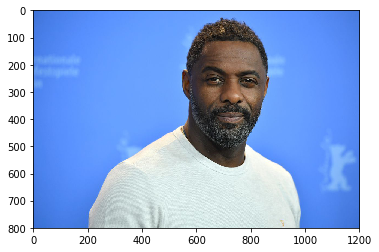

Human detected, Person looks like a German shorthaired pointer breed


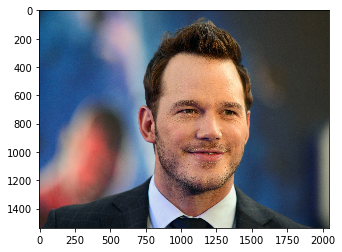

Human detected, Person looks like a Labrador retriever breed


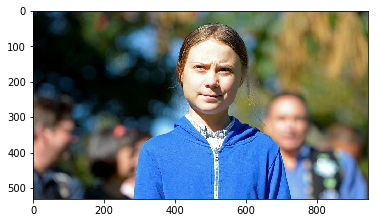

Error no dog/human detected!


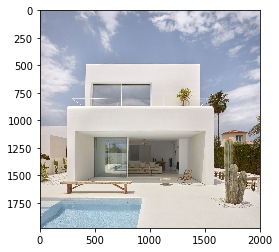

Dog detected, the breed is: Irish water spaniel


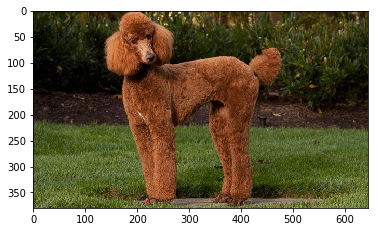

Dog detected, the breed is: Parson russell terrier


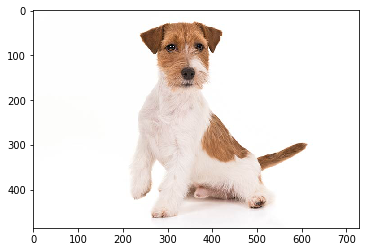

In [42]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

human_files = ['./images/human1.jpg', './images/human2.jpg', './images/human3.jpg']
dog_files = ['./images/house.jpg', './images/poodle.jpeg', './images/Jack_Russell_Terrier.jpg']

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)